In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
%matplotlib inline
from preamble import *

## Sample Datasets
We will use several datasets to illustrate the different algorithms. Some of the datasets will be small and synthetic (meaning made-up), designed to highlight particular aspects of the algorithms. Other datasets will be large, real-world examples.

An example of a synthetic two-class classification dataset is the *forge* dataset, which has two features. The following code creates a scatter plot visualizing all of the data points in this dataset. The plot has the first feature on the x-axis and the second feature on the y-axis. As is always the case in scatter plots, each data point is represented as one dot. The color and shape of the dot indicates its class:

X.shape: (26, 2)


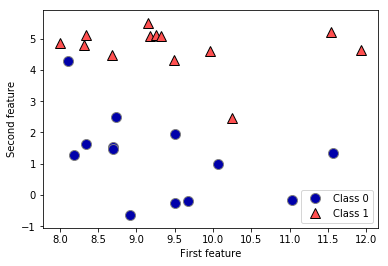

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

As you can see from X.shape, this dataset consists of 26 data points, with 2 features.

To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model. The plot created here shows the single feature on the x-axis and the regression target (the output) on the y-axis:

Text(0,0.5,'Target')

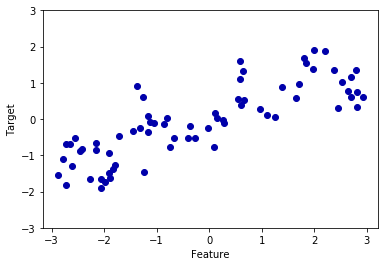

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=70)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

We are using these very simple, low-dimensional datasets because we can easily visualize them—a printed page has two dimensions, so data with more than two features is hard to show. Any intuition derived from datasets with few features (also called low-dimensional datasets) might not hold in datasets with many features (high-dimensional
datasets). As long as you keep that in mind, inspecting algorithms on low-dimensional datasets can be very instructive.

We will complement these small synthetic datasets with two real-world datasets that are included in scikit-learn. One is the Wisconsin Breast Cancer dataset (cancer, for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

The data can be loaded using the load_breast_cancer function from scikit-learn:

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The dataset consists of 569 data points, with 30 features each:

In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [7]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the `feature_names` attribute:

In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We will also be using a real-world regression dataset, the Boston Housing dataset. The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features:

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


We will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called *interactions*) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility. Including derived feature like these is called *feature engineering*. This derived dataset can be loaded using the `load_extended_boston` function:

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13.

We will use these datasets to explain and illustrate the properties of the different machine learning algorithms. But for now, let’s get to the algorithms themselves. First, we will visit the k-nearest neighbors (k-NN) algorithm.

## k-Nearest Neighbors
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

### k-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. Figure below illustrates this for the case of classification on the *forge* dataset:

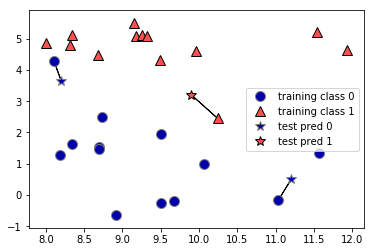

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors. The following example uses the five closest neighbors:

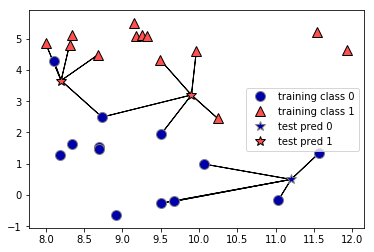

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

Again, the prediction is shown as the color of the cross. You can see that the prediction for the new data point at the top left is not the same as the prediction when we used only one neighbor.

While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes. For more classes, we count how many neighbors belong to each class and again predict the most common class.

Now let’s look at how we can apply the k-nearest neighbors algorithm using *scikitlearn*. First, we split our data into a training and a test set so we can evaluate generalization performance:

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 5:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

Now, we fit the classifier using the training set. For *KNeighborsClassifier* this means storing the dataset, so we can compute neighbors during prediction:

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

To make predictions on the test data, we call the *predict* method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [16]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the *score* method with the test data together with the test labels:

In [17]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

### Analyzing KNeighborsClassifier
For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the *decision boundary*, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors shown below:

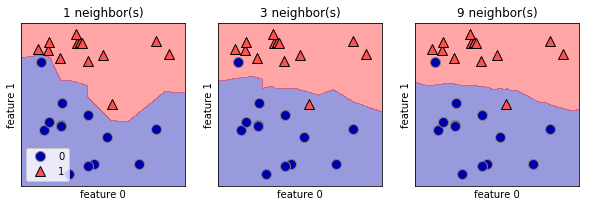

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity. If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent
in the training set.

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.
The results are shown below:

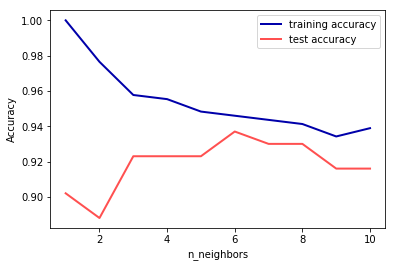

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of *n_neighbors* on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The
test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

### k-neighbors regression
There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using the single nearest neighbor, this time using the *wave* dataset. We’ve added three test data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the nearest neighbor. These are shown as blue stars below:

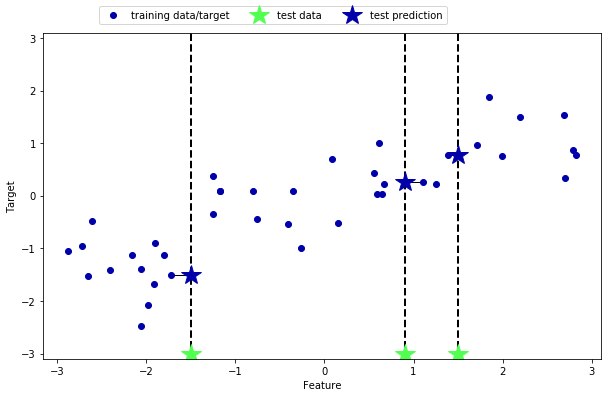

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors:

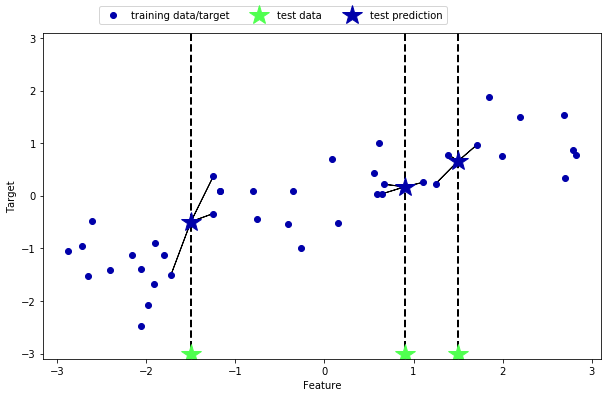

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the *KNeighbors Regressor* class in *scikit-learn*. It’s used similarly to *KNeighborsClassifier*:

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Now we can make predictions on the test set:

In [23]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


We can also evaluate the model using the *score* method, which for regressors returns the *R^2* score. The *R^2* score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, *y_train*:

In [24]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Here, the score is 0.83, which indicates a relatively good model fit.

### Analyzing KNeighborsRegressor
For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the line:

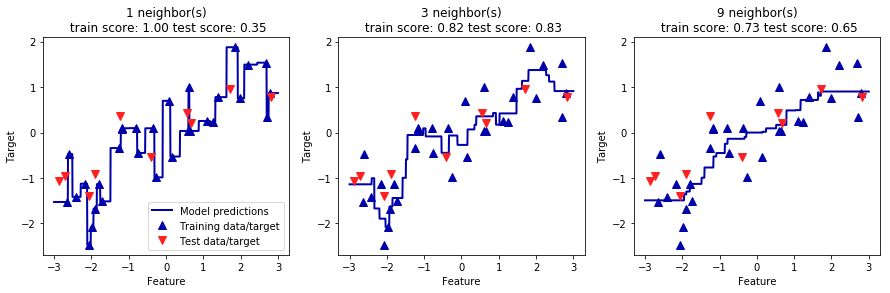

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

### Strengths, weaknesses, and parameters
In principle, there are two important parameters to the *KNeighbors classifier*: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called *sparse datasets*).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks.